### From Bias to Balance: Solving Imbalanced Data Issues

- It is true that many real-world datasets are imbalanced, meaning that they have an unequal distribution of classes or categories.
- Let’s take credit card fraud detection dataset as an example. Here, the class of interest is typically the “fraudulent” or “positive” class. This means you are primarily interested in identifying instances where credit card transactions are fraudulent or involve unauthorized activities. This class represents the minority of cases in the dataset since fraudulent transactions are relatively rare compared to legitimate ones.

### 1. Install and import required libraries

In [1]:
!pip install imblearn

In [18]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import recall_score

from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### 2. Import and explore dataset

In [19]:
df = pd.read_csv("data/creditcard.csv")

In [20]:
# to check the shape
df.shape

(284807, 31)

In [21]:
# to check the list of columns
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [22]:
# to check top 5 rows of the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [23]:
# to check duplicate rows
df[df.duplicated()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


### 3. Perform data cleaning

In [24]:
# to drop duplicate rows
df.drop_duplicates(inplace=True, keep='first')

In [25]:
# dataset shape after removing duplicate rows
df.shape

(283726, 31)

<Axes: >

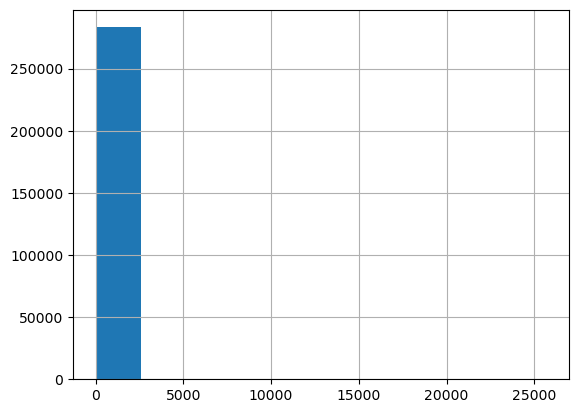

In [26]:
# plot histogram and boxplot of amount column
df.Amount.hist()

<Axes: >

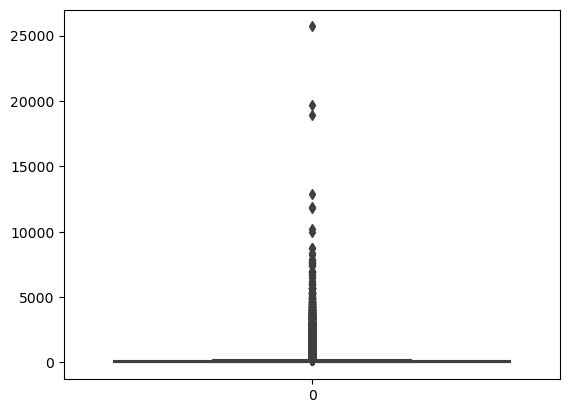

In [27]:
sns.boxplot(df.Amount)

In [28]:
# data distribution looks skewed, lets check list of rows having amount >= 10000
df[df.Amount>=10000]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
46841,42951.0,-23.712839,-42.172688,-13.320825,9.925019,-13.945538,5.564891,15.710644,-2.844253,-1.580725,...,7.921600,-6.320710,-11.310338,0.404175,-4.547278,-1.577118,-2.357385,2.253662,12910.93,0
54018,46253.0,-21.780665,-38.305310,-12.122469,9.752791,-12.880794,4.256017,14.785051,-2.818253,-0.667338,...,7.437478,-5.619439,-10.547038,0.653249,-4.232409,-0.480459,-2.257913,2.082488,11898.09,0
58465,48401.0,-36.802320,-63.344698,-20.645794,16.715537,-20.672064,7.694002,24.956587,-4.730111,-2.687312,...,11.455313,-10.933144,-17.173665,1.180700,-7.025783,-2.534330,-3.602479,3.450224,19656.53,0
151296,95286.0,-34.549296,-60.464618,-21.340854,16.875344,-19.229075,6.335259,24.422716,-4.964566,0.188912,...,11.502580,-9.499423,-16.513186,0.744341,-7.081325,-2.604551,-3.550963,3.250802,18910.00,0
169457,119713.0,-20.924897,-37.943452,-14.060281,10.473005,-10.866639,6.256654,14.960521,-2.392155,-0.597076,...,6.829810,-6.926353,-9.928657,-0.447084,-4.848151,-2.241620,-2.140723,2.001492,11789.84,0
227921,145283.0,-21.532478,-34.704768,-8.303035,10.264175,3.957175,-3.229695,-4.066768,-4.083971,0.554072,...,5.198718,-7.331078,-32.828995,0.118986,-8.696627,-1.778061,-0.519786,2.716716,10000.00,0
274771,166198.0,-35.548539,-31.850484,-48.325589,15.304184,-113.743307,73.301626,120.589494,-27.347360,-3.872425,...,-21.620120,5.712303,-1.581098,4.584549,4.554683,3.415636,31.612198,-15.430084,25691.16,0
284249,172273.0,-9.030538,-11.112584,-16.233798,3.592021,-40.427726,23.917837,44.054461,-7.277778,-4.210637,...,-0.269048,0.988144,7.040028,0.347693,2.520869,2.342495,3.478175,-2.713136,10199.44,0


In [29]:
# remove rows having Amount>=10000
df = df[df.Amount<10000]

### 4. Check class distribution of label column

In [31]:
df.Class.value_counts(normalize=True)

0    0.998333
1    0.001667
Name: Class, dtype: float64

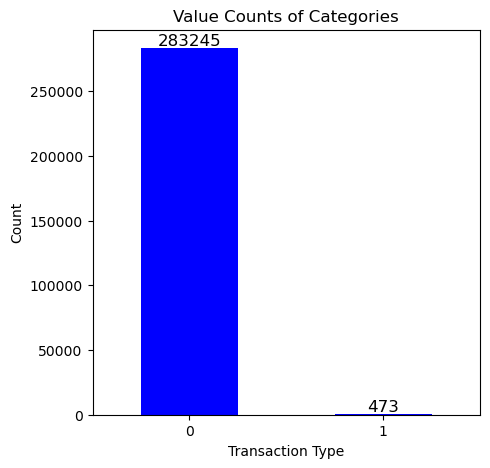

In [32]:
value_counts = df.Class.value_counts()

plt.figure(figsize=(5, 5))
value_counts.plot(kind='bar', color='blue')

# Add count labels on top of each bar
for i, count in enumerate(value_counts):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=12)

plt.title('Value Counts of Categories')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### 5. Train/Test split and check data distribution of both train/test datasets

In [33]:
X = df.drop(['Class'], axis = 1)
Y = df.Class


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=11)

In [34]:
X_train.shape, X_test.shape

((198602, 30), (85116, 30))

In [37]:
# label data distribution of train dataset
y_train.value_counts()

0    198259
1       343
Name: Class, dtype: int64

In [38]:
# label data distribution of test dataset
y_test.value_counts()

0    84986
1      130
Name: Class, dtype: int64

### 6. Perform PCA and check how data is distributed in raw dataset using 2D/3D sctter plot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


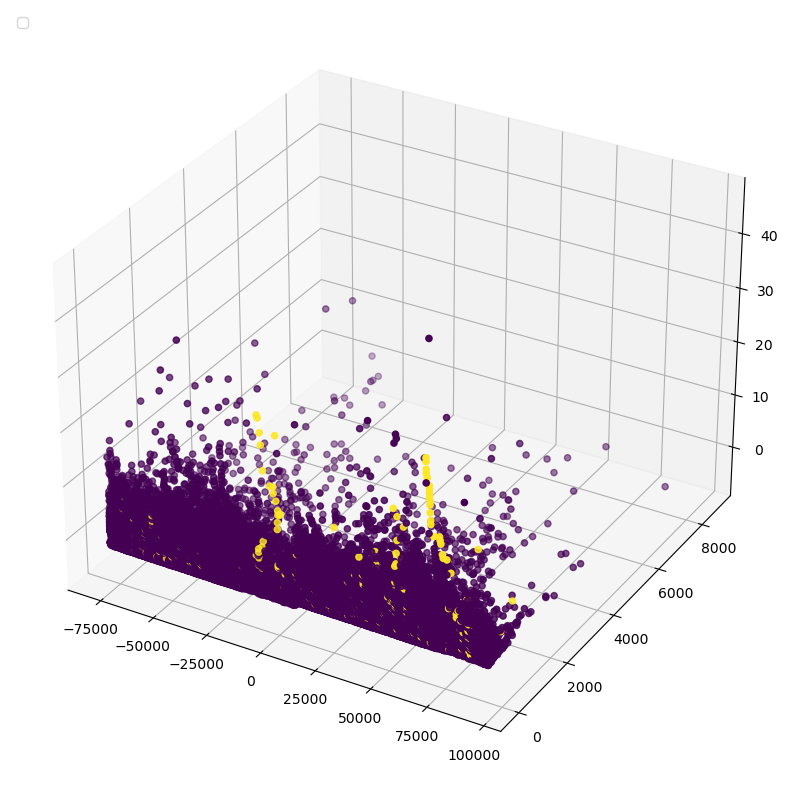

In [39]:
# to generate 3D scatter plot
pca = PCA(3)
pca_data = pd.DataFrame(pca.fit_transform(X_train),columns=['PC1','PC2','PC3'])
pca_data['Transaction Type'] = y_train.to_list()

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection = '3d')

x = pca_data.PC1
y = pca_data.PC2
z = pca_data.PC3

ax.scatter(x, y, z, c=pca_data['Transaction Type'])
plt.legend(loc=2)

plt.show()

<Axes: xlabel='PC1', ylabel='PC2'>

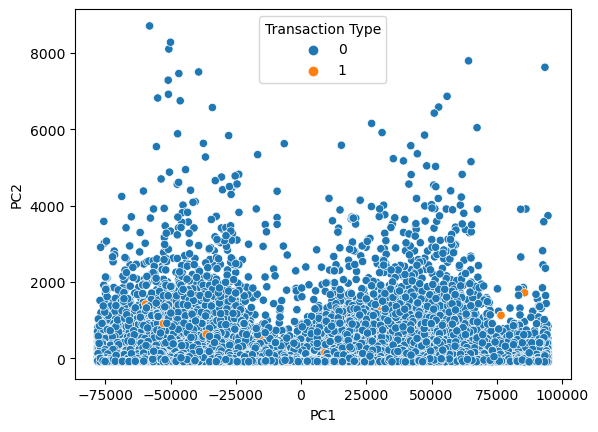

In [40]:
# to generate 2D scatter plot
pca = PCA(2)
pca_data = pd.DataFrame(pca.fit_transform(X_train),columns=['PC1','PC2'])
pca_data['Transaction Type'] = y_train.to_list()

sns.scatterplot(x="PC1",y="PC2",hue="Transaction Type",data=pca_data)

### 7. Base model

In [41]:
confusion_matrices = []
classification_reports = []

In [42]:
model = LogisticRegression()
model.fit(X_train, y_train)
model_score = model.score(X_test, y_test)

C:\Users\Viper Pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
print("Base Model = ", model_score)

Base Model =  0.9989191221391983


In [44]:
test_pred = model.predict(X_test)
print(metrics.classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84986
           1       0.64      0.66      0.65       130

    accuracy                           1.00     85116
   macro avg       0.82      0.83      0.83     85116
weighted avg       1.00      1.00      1.00     85116



Confusion Matrix


<Axes: >

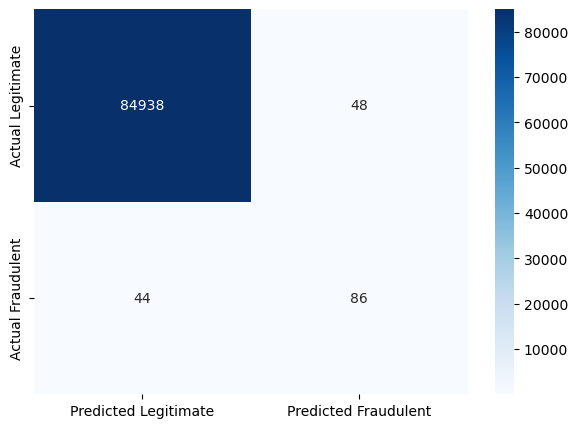

In [45]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, test_pred, labels=[0,1])

df_cm = pd.DataFrame(cm, index = [i for i in ['Actual Legitimate', 'Actual Fraudulent']],
                  columns = [i for i in ['Predicted Legitimate', 'Predicted Fraudulent']])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='Blues')

In [46]:
confusion_matrices.append(metrics.confusion_matrix(y_test, test_pred))

###  8. Random Under Sampling

In [47]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


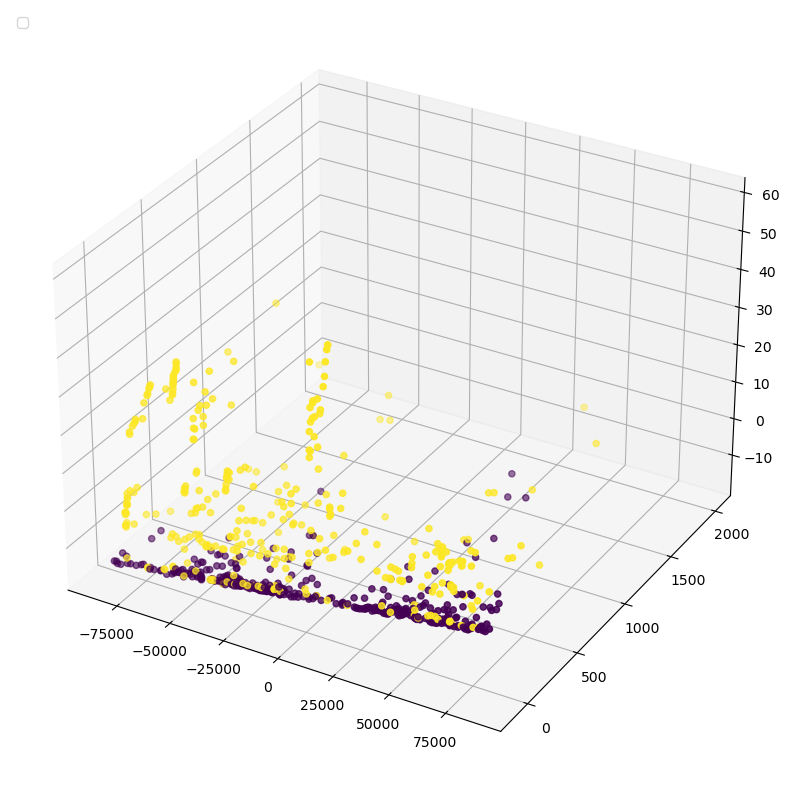

In [48]:
pca = PCA(3)
pca_data = pd.DataFrame(pca.fit_transform(X_rus),columns=['PC1','PC2','PC3'])
pca_data['Transaction Type'] = y_rus.to_list()

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection = '3d')

x = pca_data.PC1
y = pca_data.PC2
z = pca_data.PC3

ax.scatter(x, y, z, c=pca_data['Transaction Type'])
plt.legend(loc=2)

plt.show()

<Axes: xlabel='PC1', ylabel='PC2'>

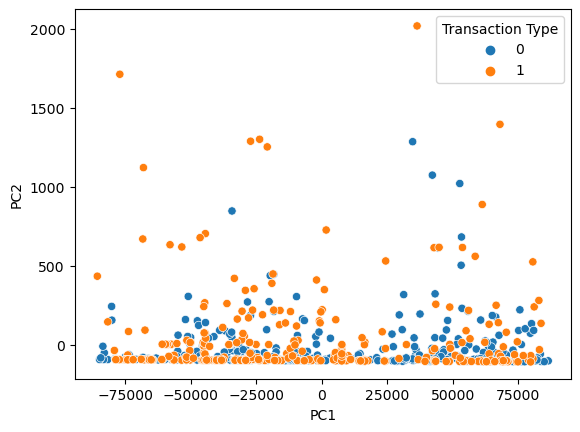

In [49]:
pca = PCA(2)
pca_data = pd.DataFrame(pca.fit_transform(X_rus),columns=['PC1','PC2'])
pca_data['Transaction Type'] = y_rus.to_list()

sns.scatterplot(x="PC1",y="PC2",hue="Transaction Type",data=pca_data)

In [50]:
model = LogisticRegression()
model.fit(X_rus, y_rus)
model_score = model.score(X_test, y_test)

In [51]:
print("Random Under Sample = ", model_score)

Random Under Sample =  0.9388481601579022


In [52]:
test_pred = model.predict(X_test)
print(metrics.classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     84986
           1       0.02      0.92      0.04       130

    accuracy                           0.94     85116
   macro avg       0.51      0.93      0.51     85116
weighted avg       1.00      0.94      0.97     85116



Confusion Matrix


<Axes: >

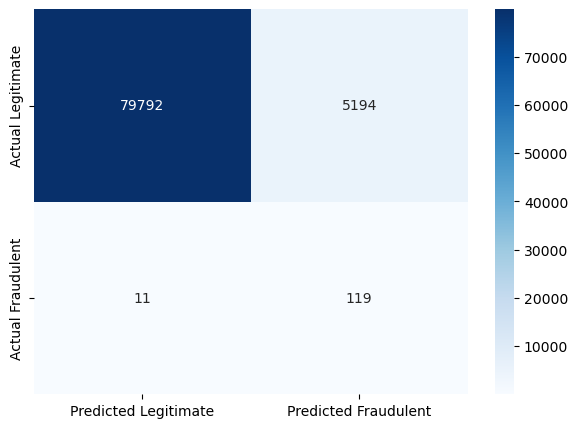

In [53]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, test_pred, labels=[0,1])

df_cm = pd.DataFrame(cm, index = [i for i in ['Actual Legitimate', 'Actual Fraudulent']],
                  columns = [i for i in ['Predicted Legitimate', 'Predicted Fraudulent']])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='Blues')

In [54]:
confusion_matrices.append(metrics.confusion_matrix(y_test, test_pred))


###  9. Random Over Sampling

In [55]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X_train, y_train)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


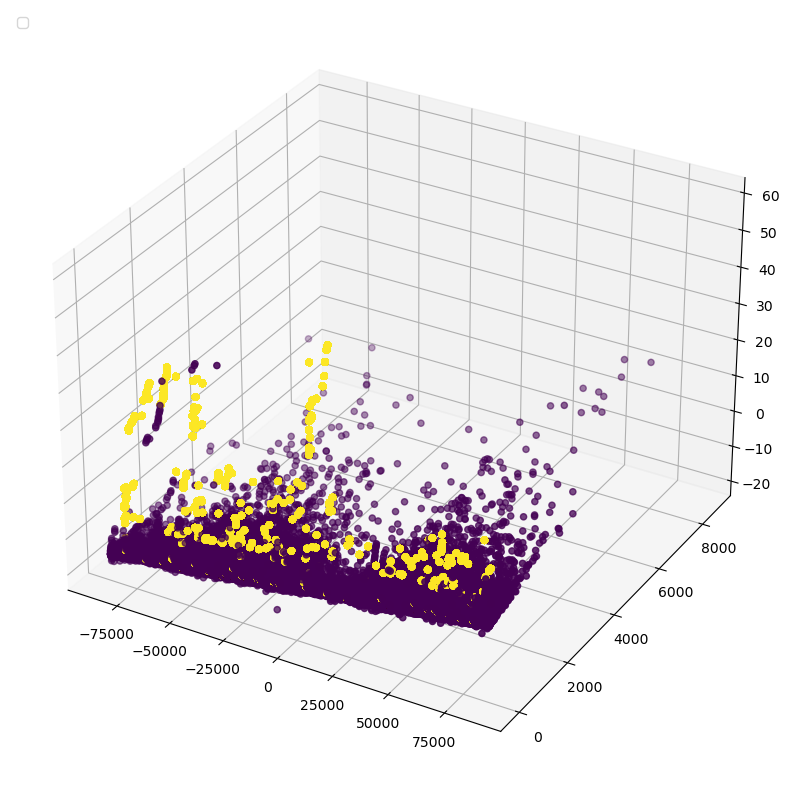

In [56]:
pca = PCA(3)
pca_data = pd.DataFrame(pca.fit_transform(X_ros),columns=['PC1','PC2','PC3'])
pca_data['Transaction Type'] = y_ros.to_list()

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection = '3d')

x = pca_data.PC1
y = pca_data.PC2
z = pca_data.PC3

ax.scatter(x, y, z, c=pca_data['Transaction Type'])
plt.legend(loc=2)

plt.show()

<Axes: xlabel='PC1', ylabel='PC2'>

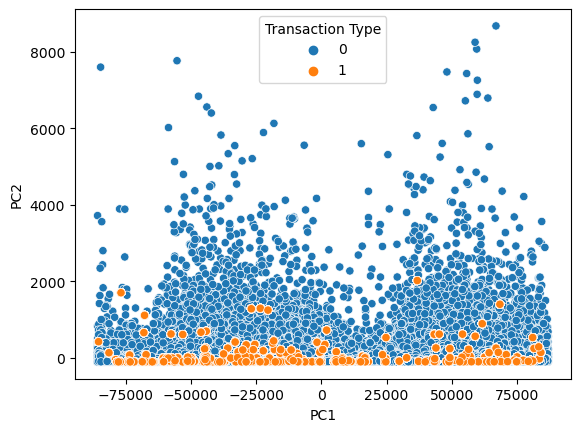

In [57]:
pca = PCA(2)
pca_data = pd.DataFrame(pca.fit_transform(X_ros),columns=['PC1','PC2'])
pca_data['Transaction Type'] = y_ros.to_list()

sns.scatterplot(x="PC1",y="PC2",hue="Transaction Type",data=pca_data)

In [58]:
model = LogisticRegression()
model.fit(X_ros, y_ros)
model_score = model.score(X_test, y_test)

C:\Users\Viper Pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
print("Random Over Sample = ", model_score)

Random Over Sample =  0.9619930447859392


In [60]:
test_pred = model.predict(X_test)
print(metrics.classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     84986
           1       0.04      0.94      0.07       130

    accuracy                           0.96     85116
   macro avg       0.52      0.95      0.53     85116
weighted avg       1.00      0.96      0.98     85116



Confusion Matrix


<Axes: >

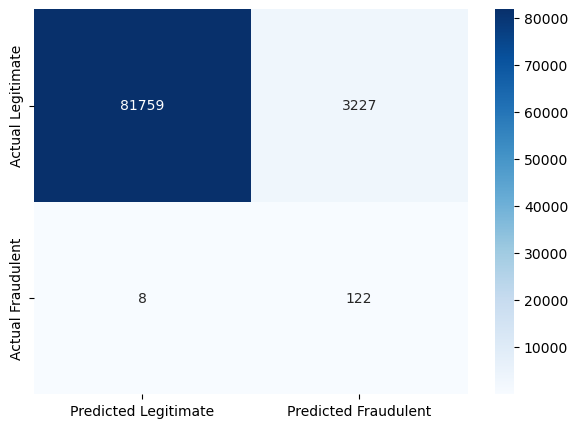

In [61]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, test_pred, labels=[0,1])

df_cm = pd.DataFrame(cm, index = [i for i in ['Actual Legitimate', 'Actual Fraudulent']],
                  columns = [i for i in ['Predicted Legitimate', 'Predicted Fraudulent']])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='Blues')

In [62]:
confusion_matrices.append(metrics.confusion_matrix(y_test, test_pred))

### 10. SMOTE

C:\Users\Viper Pc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Viper Pc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Viper Pc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Viper Pc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Viper Pc\anaconda3\lib\site-package

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

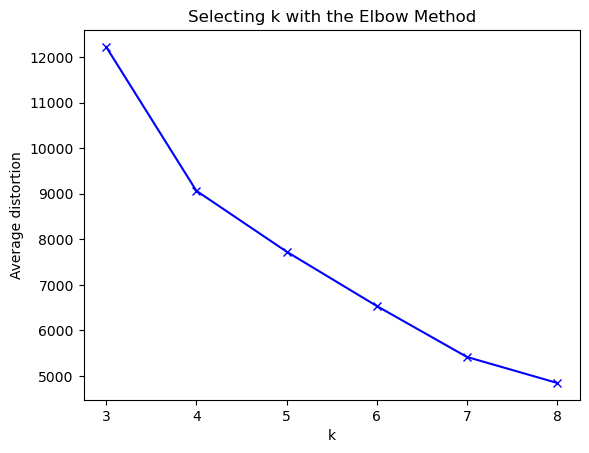

In [63]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(3,9)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(X_train)
    prediction=model.predict(X_train)
    meanDistortions.append(sum(np.min(cdist(X_train, model.cluster_centers_, 'euclidean'), axis=1)) / X_train.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [64]:
sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 4, random_state=1)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


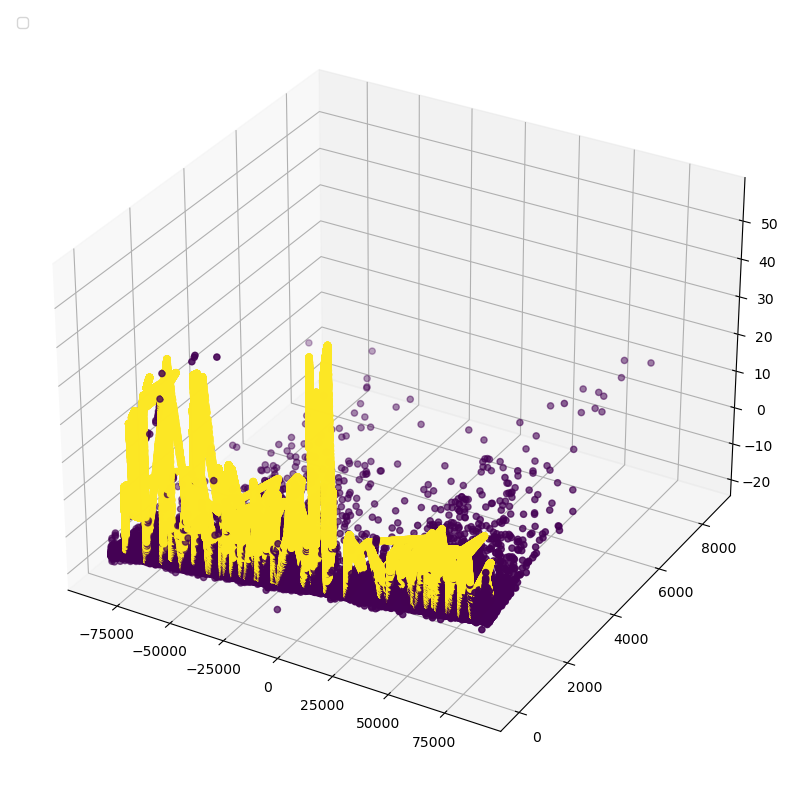

In [65]:
pca = PCA(3)
pca_data = pd.DataFrame(pca.fit_transform(X_train_res),columns=['PC1','PC2','PC3'])
pca_data['Transaction Type'] = y_train_res

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection = '3d')

x = pca_data.PC1
y = pca_data.PC2
z = pca_data.PC3

ax.scatter(x, y, z, c=pca_data['Transaction Type'])
plt.legend(loc=2)

plt.show()

<Axes: xlabel='PC1', ylabel='PC2'>

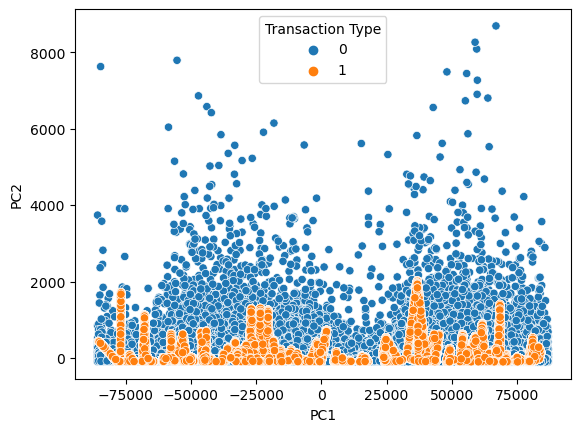

In [66]:
pca = PCA(2)
pca_data = pd.DataFrame(pca.fit_transform(X_train_res),columns=['PC1','PC2'])
pca_data['Transaction Type'] = y_train_res

sns.scatterplot(x="PC1",y="PC2",hue="Transaction Type",data=pca_data)

In [67]:
model = LogisticRegression()
model.fit(X_train_res, y_train_res)
model_score = model.score(X_test, y_test)

In [68]:
print("SMOTE = ", model_score)

SMOTE =  0.9647539827999436


In [69]:
test_pred = model.predict(X_test)
print(metrics.classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     84986
           1       0.04      0.88      0.07       130

    accuracy                           0.96     85116
   macro avg       0.52      0.92      0.53     85116
weighted avg       1.00      0.96      0.98     85116



Confusion Matrix


<Axes: >

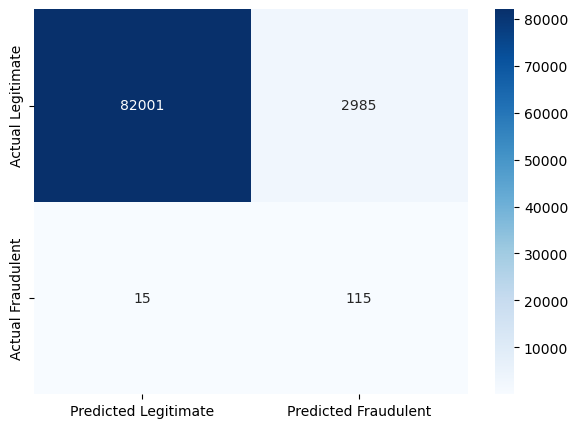

In [70]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, test_pred, labels=[0,1])

df_cm = pd.DataFrame(cm, index = [i for i in ['Actual Legitimate', 'Actual Fraudulent']],
                  columns = [i for i in ['Predicted Legitimate', 'Predicted Fraudulent']])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='Blues')

In [71]:
confusion_matrices.append(metrics.confusion_matrix(y_test, test_pred))

###  11. TomekLinks

In [72]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks()
X_tl, y_tl = tl.fit_resample(X_train, y_train) 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


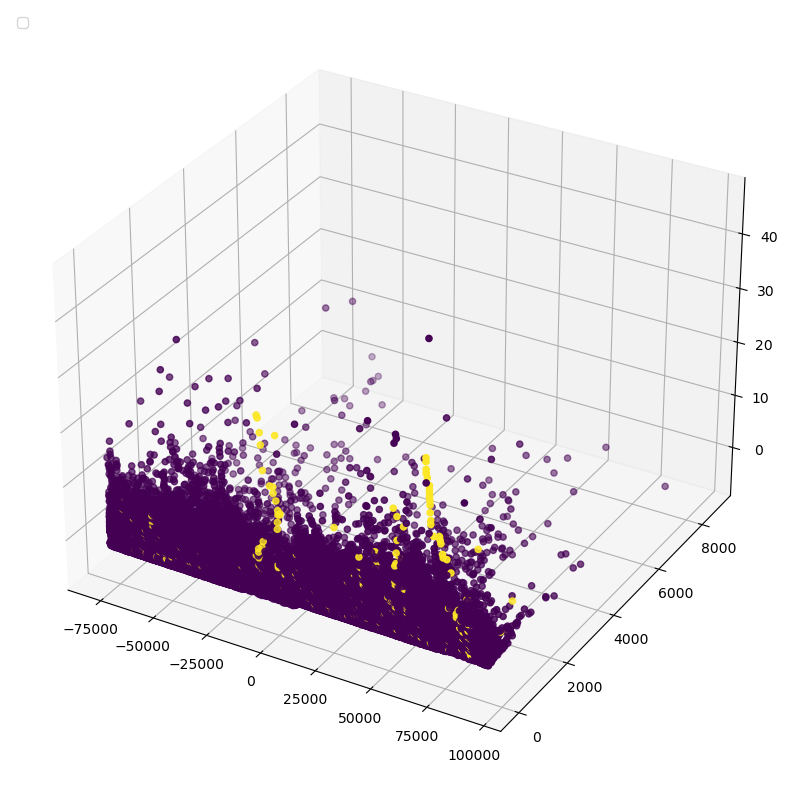

In [73]:
pca = PCA(3)
pca_data = pd.DataFrame(pca.fit_transform(X_tl),columns=['PC1','PC2','PC3'])
pca_data['Transaction Type'] = y_tl

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection = '3d')

x = pca_data.PC1
y = pca_data.PC2
z = pca_data.PC3

ax.scatter(x, y, z, c=pca_data['Transaction Type'])
plt.legend(loc=2)

plt.show()

<Axes: xlabel='PC1', ylabel='PC2'>

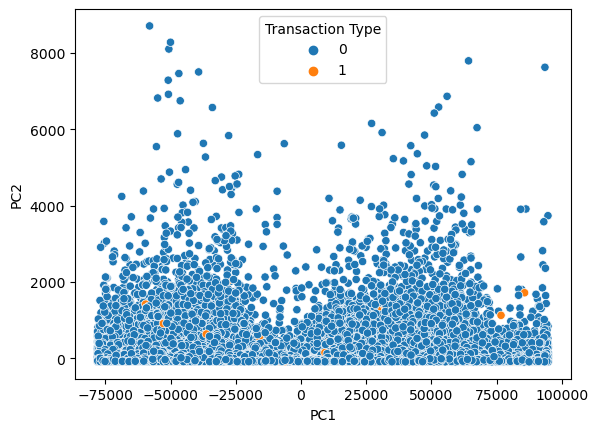

In [74]:
pca = PCA(2)
pca_data = pd.DataFrame(pca.fit_transform(X_tl),columns=['PC1','PC2'])
pca_data['Transaction Type'] = y_tl

sns.scatterplot(x="PC1",y="PC2",hue="Transaction Type",data=pca_data)

In [75]:
model = LogisticRegression()
model.fit(X_tl, y_tl)
model_score = model.score(X_test, y_test)

C:\Users\Viper Pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [76]:
print("TomekLinks = ", model_score)

TomekLinks =  0.9989191221391983


In [77]:
test_pred = model.predict(X_test)
print(metrics.classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84986
           1       0.64      0.66      0.65       130

    accuracy                           1.00     85116
   macro avg       0.82      0.83      0.83     85116
weighted avg       1.00      1.00      1.00     85116



Confusion Matrix


<Axes: >

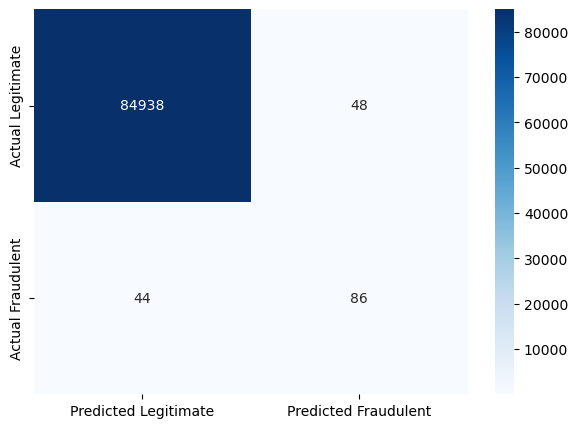

In [78]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, test_pred, labels=[0,1])

df_cm = pd.DataFrame(cm, index = [i for i in ['Actual Legitimate', 'Actual Fraudulent']],
                  columns = [i for i in ['Predicted Legitimate', 'Predicted Fraudulent']])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='Blues')

In [79]:
confusion_matrices.append(metrics.confusion_matrix(y_test, test_pred))

### 12. Cluster based undersampling

In [80]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids()  
X_cc, y_cc = cc.fit_resample(X_train, y_train)

C:\Users\Viper Pc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


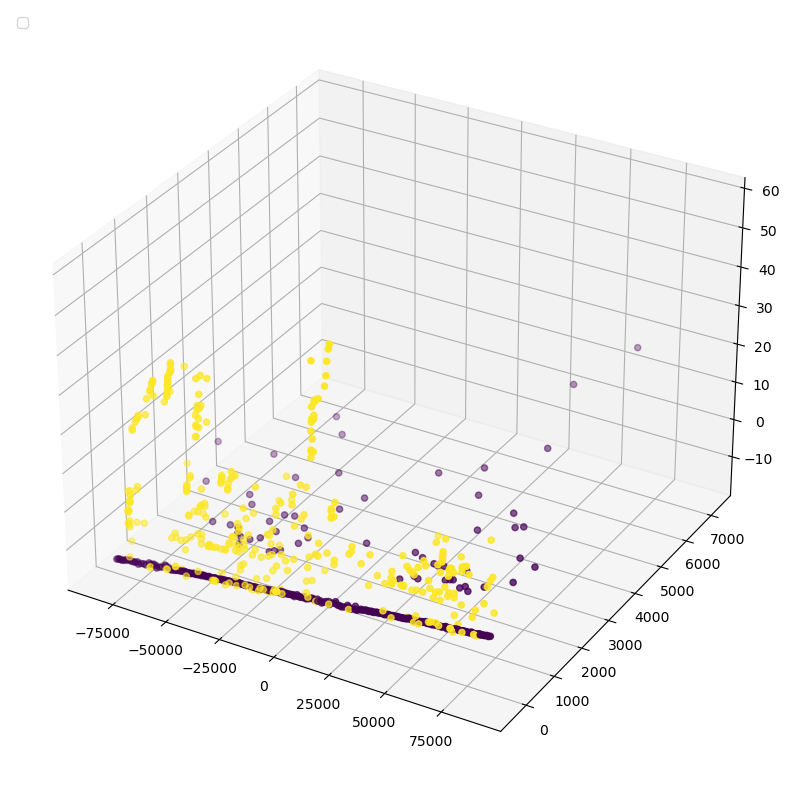

In [81]:
pca = PCA(3)
pca_data = pd.DataFrame(pca.fit_transform(X_cc),columns=['PC1','PC2','PC3'])
pca_data['Transaction Type'] = y_cc

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection = '3d')

x = pca_data.PC1
y = pca_data.PC2
z = pca_data.PC3

ax.scatter(x, y, z, c=pca_data['Transaction Type'])
plt.legend(loc=2)

plt.show()

<Axes: xlabel='PC1', ylabel='PC2'>

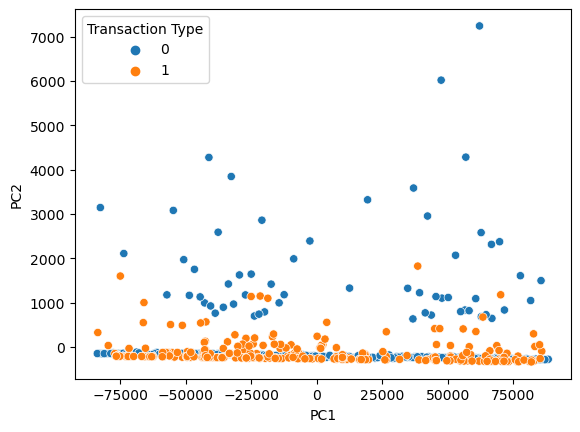

In [82]:
pca = PCA(2)
pca_data = pd.DataFrame(pca.fit_transform(X_cc),columns=['PC1','PC2'])
pca_data['Transaction Type'] = y_cc

sns.scatterplot(x="PC1",y="PC2",hue="Transaction Type",data=pca_data)

In [83]:
model = LogisticRegression()
model.fit(X_cc, y_cc)
model_score = model.score(X_test, y_test)

In [84]:
print("Cluster-Based Undersampling = ", model_score)

Cluster-Based Undersampling =  0.8638328868837821


In [85]:
test_pred = model.predict(X_test)
print(metrics.classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       1.00      0.86      0.93     84986
           1       0.01      0.96      0.02       130

    accuracy                           0.86     85116
   macro avg       0.51      0.91      0.47     85116
weighted avg       1.00      0.86      0.93     85116



Confusion Matrix


<Axes: >

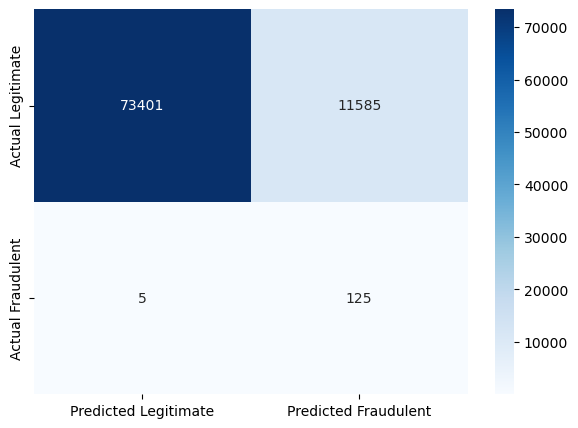

In [86]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, test_pred, labels=[0,1])

df_cm = pd.DataFrame(cm, index = [i for i in ['Actual Legitimate', 'Actual Fraudulent']],
                  columns = [i for i in ['Predicted Legitimate', 'Predicted Fraudulent']])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='Blues')

In [87]:
confusion_matrices.append(metrics.confusion_matrix(y_test, test_pred))

### 13. Combined Results

In [88]:
def calculate_summary_metrics(conf_matrix):
    tn, fp, fn, tp = conf_matrix.ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * (precision * recall) / (precision + recall)
    return tp, fp, tn, fn, accuracy, precision, recall, f1_score

summary_metrics = []

for conf_matrix in confusion_matrices:
    metrics = calculate_summary_metrics(conf_matrix)
    summary_metrics.append(metrics)
    
metrics_df = pd.DataFrame(summary_metrics, columns=['TP', 'FP', 'TN', 'FN', 'Accuracy', 'Precision', 'Recall', 'F1_score'])


metrics_df['Model']=['Base', 'Random Under Sampling', 'Random Over Sampling', 'SMOTE', 'TOMEKLinks', 'Cluster-Based Under Sampling']

metrics_df.set_index('Model', inplace=True)

In [89]:
metrics_df

,TP,FP,TN,FN,Accuracy,Precision,Recall,F1_score
Model,,,,,,,,
Base,86,48,84938,44,0.998919,0.641791,0.661538,0.651515
Random Under Sampling,119,5194,79792,11,0.938848,0.022398,0.915385,0.043726
Random Over Sampling,122,3227,81759,8,0.961993,0.036429,0.938462,0.070135
SMOTE,115,2985,82001,15,0.964754,0.037097,0.884615,0.071207
TOMEKLinks,86,48,84938,44,0.998919,0.641791,0.661538,0.651515
Cluster-Based Under Sampling,125,11585,73401,5,0.863833,0.010675,0.961538,0.021115


Text(0.5, 1.0, 'Comparison of True Positives of all experiments')

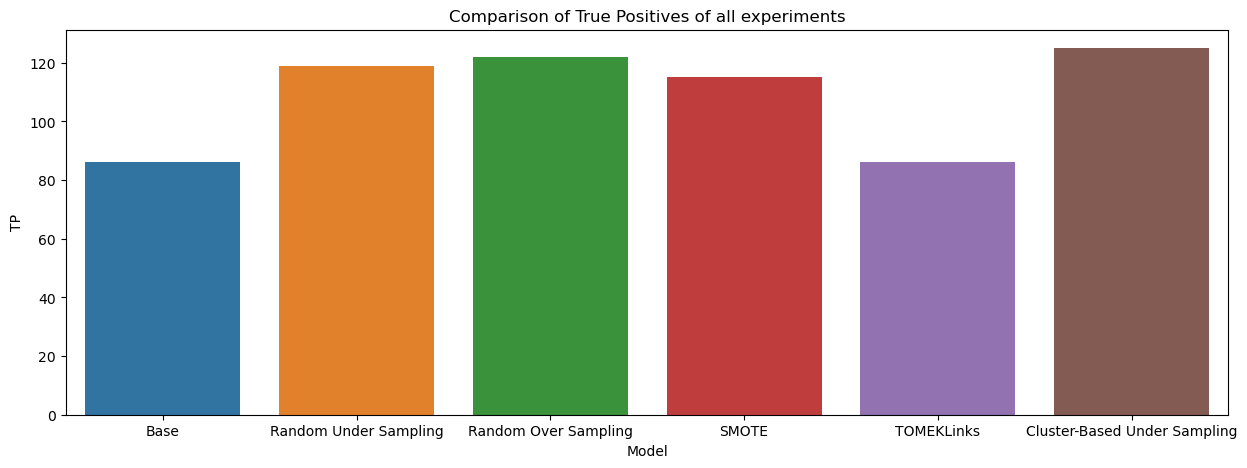

In [98]:
plt.figure(figsize=(15, 5))
sns.barplot(x=metrics_df.index, y=metrics_df['TP'])
plt.title("Comparison of True Positives of all experiments")

Text(0.5, 1.0, 'Comparison of False Positives of all experiments')

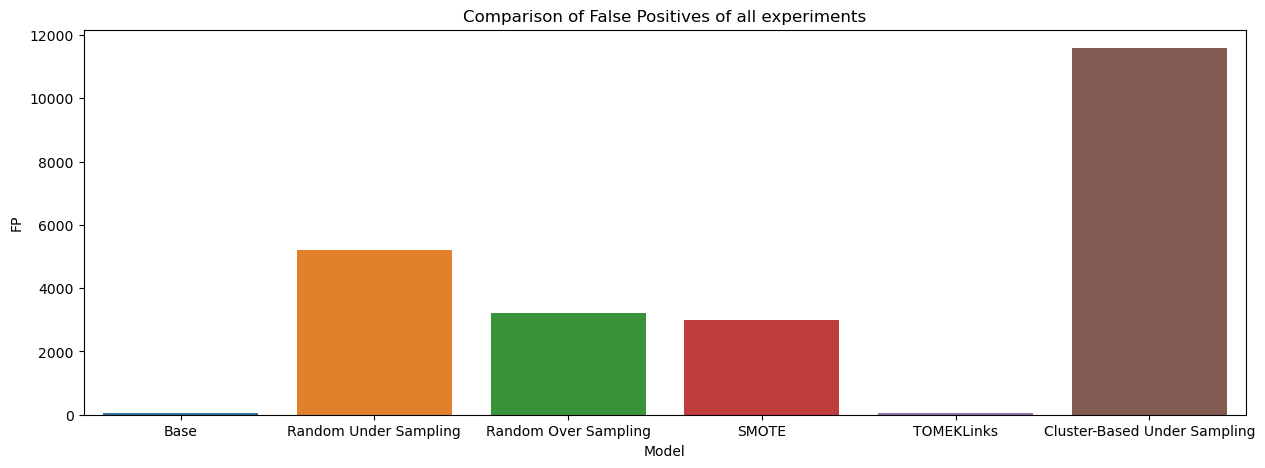

In [99]:
plt.figure(figsize=(15, 5))
sns.barplot(x=metrics_df.index, y=metrics_df['FP'])
plt.title("Comparison of False Positives of all experiments")

Text(0.5, 1.0, 'Comparison of False Negatives of all experiments')

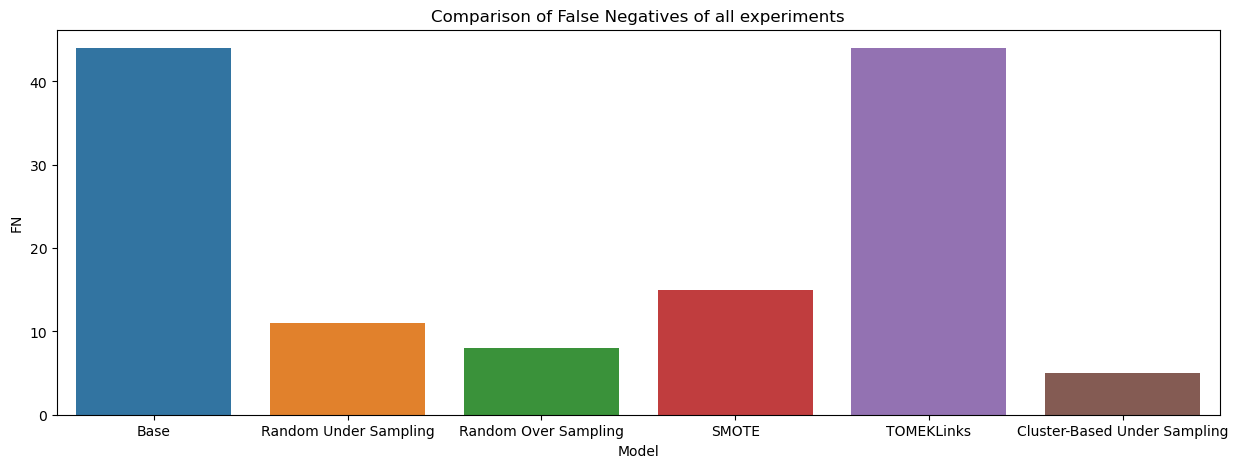

In [100]:
plt.figure(figsize=(15, 5))
sns.barplot(x=metrics_df.index, y=metrics_df['FN'])
plt.title("Comparison of False Negatives of all experiments")

### 14. Conclusion

- From above comparison we can say that **Random Over Sampling** and **SMOTE** is performing better than other methods.
- When you try to reduce Type 1 error (False Positive Rate), it often increases Type 2 error (False Negative Rate), and vice versa. This relationship is known as the “trade-off” between Type 1 and Type 2 errors.
- Balancing datasets and managing the trade-off between Type 1 and Type 2 errors are interconnected challenges in machine learning. Finding the right equilibrium is a nuanced process that demands a thorough understanding of the problem, thoughtful experimentation, and a commitment to aligning model performance with the specific goals and consequences of classification errors in the given application.